Модель сети Хопфилда в асинхронном режиме с дискретным состоянием и дескретным временем

In [561]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from PIL import Image

In [562]:
# data = pd.read_csv('data.csv')
# label = None
# while label in [None,0,1,2,3,4,5,6,7,8,9]:
#     num = randint(0,9999)
#     label, ex = np.array(data.iloc[num])[0], np.array(data.iloc[num])[1:]
# bipolar = np.vectorize(lambda x: 255 if x > 127 else 0)
# ex = bipolar(ex).reshape(28,28)
# plt.title(str(label) + "," + str(num))
# plt.imshow(ex, cmap='gray')
#-------------------------------------------
# im = Image.fromarray(ex.astype(np.uint8))
# im.save("Numbers/1.png")

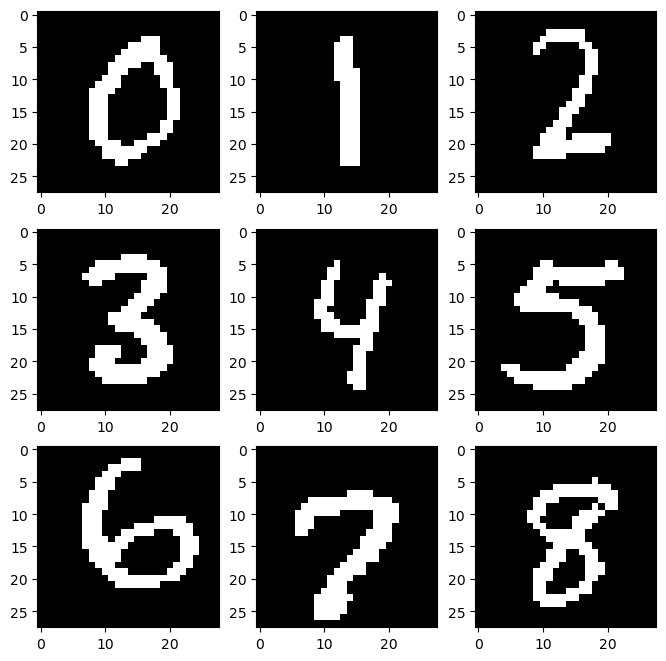

In [565]:
data = []
for i in range(10):
    img = Image.open(f'Numbers/{i}.png')
    num = np.asarray(img)
    data.append(num)
matplotlib.rcParams['figure.figsize'] = [8, 8]
fig, axs = plt.subplots(3, 3)
for i in range(9):
    axs[i//3, i%3].imshow(data[i].reshape(28,28), cmap = 'gray')